互联网发展到现在，搜索引擎已经非常好用，基本上输入关键词，都能找到匹配的内容，质量还不错。但在 1998 年之前，搜索引擎的体验并不好。早期的搜索引擎，会遇到下面的两类问题：

1、返回结果质量不高：搜索结果不考虑网页的质量，而是通过时间顺序进行检索；

2、容易被人钻空子：搜索引擎是基于检索词进行检索的，页面中检索词出现的频次越高，匹配度越高，这样就会出现网页作弊的情况。有些网页为了增加搜索引擎的排名，故意增加某个检索词的频率。

基于这些缺陷，当时 Google 的创始人拉里·佩奇提出了 PageRank 算法，目的就是要找到优质的网页，这样 Google 的排序结果不仅能找到用户想要的内容，而且还会从众多网页中筛选出权重高的呈现给用户。

Google 的两位创始人都是斯坦福大学的博士生，他们提出的 PageRank 算法受到了论文影响力因子的评价启发。当一篇论文被引用的次数越多，证明这篇论文的影响力越大。正是这个想法解决了当时网页检索质量不高的问题。

**PageRank 的简化模型**

我们先来看下 PageRank 是如何计算的。

我假设一共有 4 个网页 A、B、C、D。它们之间的链接信息如图所示：

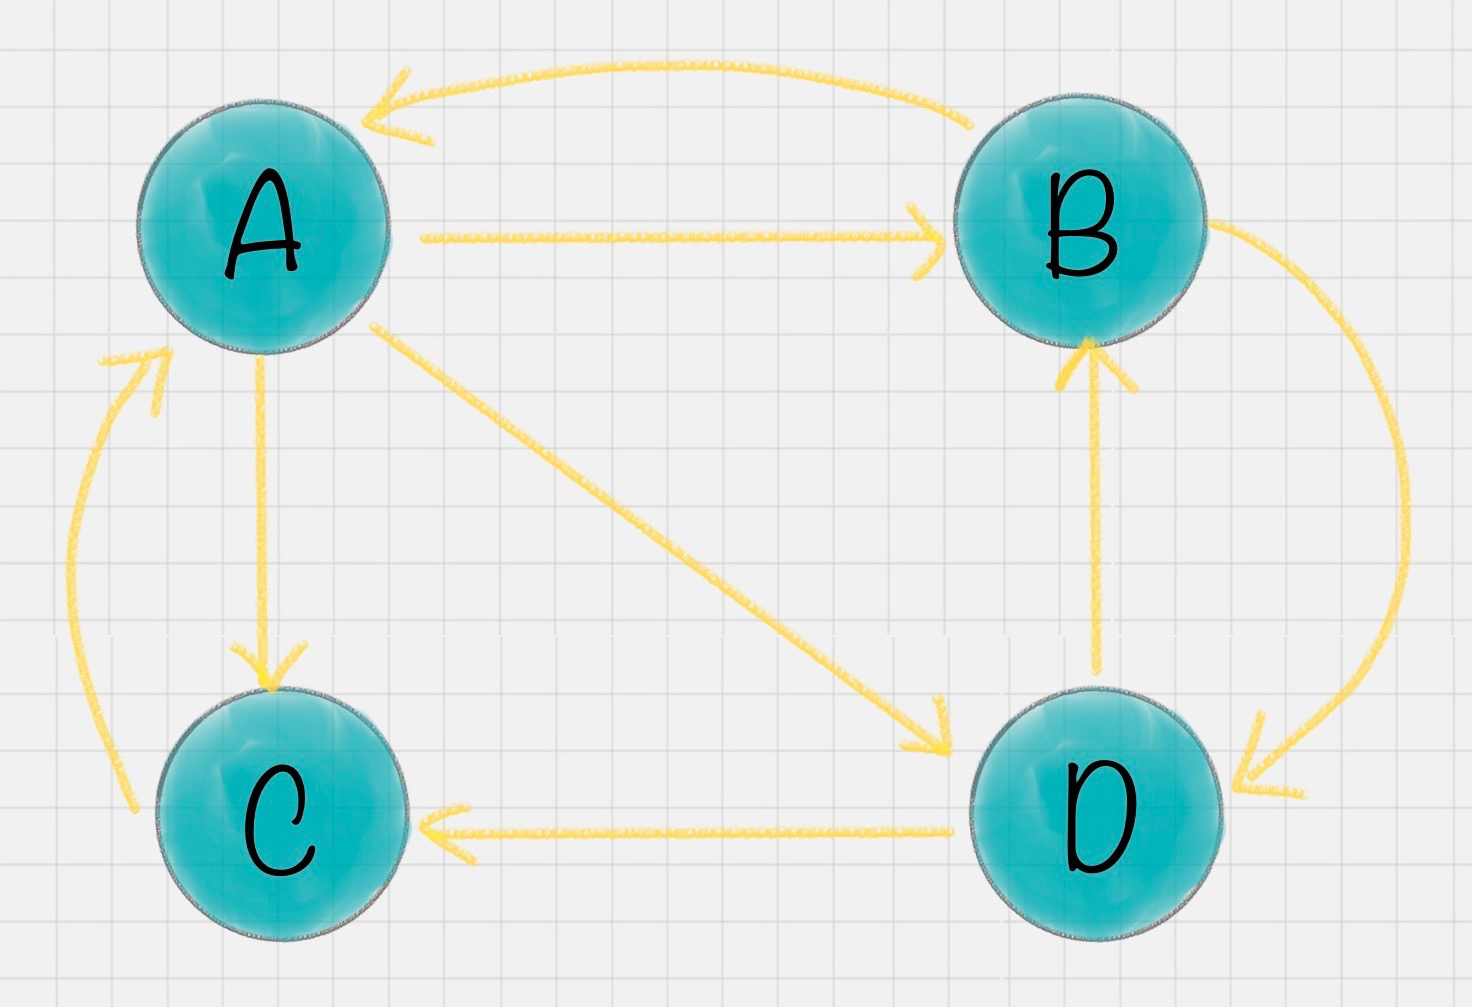

这里有两个概念你需要了解一下。

出链指的是链接出去的链接。入链指的是链接进来的链接。比如图中 A 有 2 个入链，3 个出链。

简单来说，一个网页的影响力 = 所有入链集合的页面的加权影响力之和，用公式表示为：

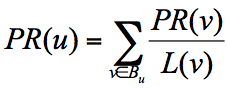

u 为待评估的页面，Bu为页面 u 的入链集合。针对入链集合中的任意页面 v，它能给 u 带来的影响力是其自身的影响力 PR(v) 除以 v 页面的出链数量，即页面 v 把影响力 PR(v) 平均分配给了它的出链，这样统计所有能给 u 带来链接的页面 v，得到的总和就是网页 u 的影响力，即为 PR(u)。

所以你能看到，出链会给被链接的页面赋予影响力，当我们统计了一个网页链出去的数量，也就是统计了这个网页的跳转概率。在这个例子中，你能看到 A 有三个出链分别链接到了 B、C、D 上。那么当用户访问 A 的时候，就有跳转到 B、C 或者 D 的可能性，跳转概率均为 1/3。B 有两个出链，链接到了 A 和 D 上，跳转概率为 1/2。

这样，我们可以得到 A、B、C、D 这四个网页的转移矩阵 M：

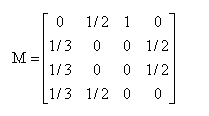

我们假设 A、B、C、D 四个页面的初始影响力都是相同的，即：

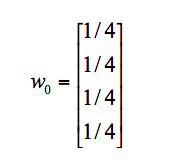

当进行第一次转移之后，各页面的影响力 w1 变为：

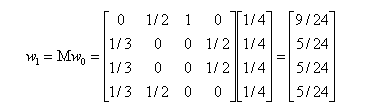

然后我们再用转移矩阵乘以 w1 得到 w2 结果，直到第 n 次迭代后 wn 影响力不再发生变化，可以收敛到 (0.3333，0.2222，0.2222，0.2222），也就是对应着 A、B、C、D 四个页面最终平衡状态下的影响力。

你能看出 A 页面相比于其他页面来说权重更大，也就是 PR 值更高。而 B、C、D 页面的 PR 值相等。至此，我们模拟了一个简化的 PageRank 的计算过程，实际情况会比这个复杂，可能会面临两个问题：
1. 等级泄露（Rank Leak）：如果一个网页没有出链，就像是一个黑洞一样，吸收了其他网页的影响力而不释放，最终会导致其他网页的 PR 值为 0。

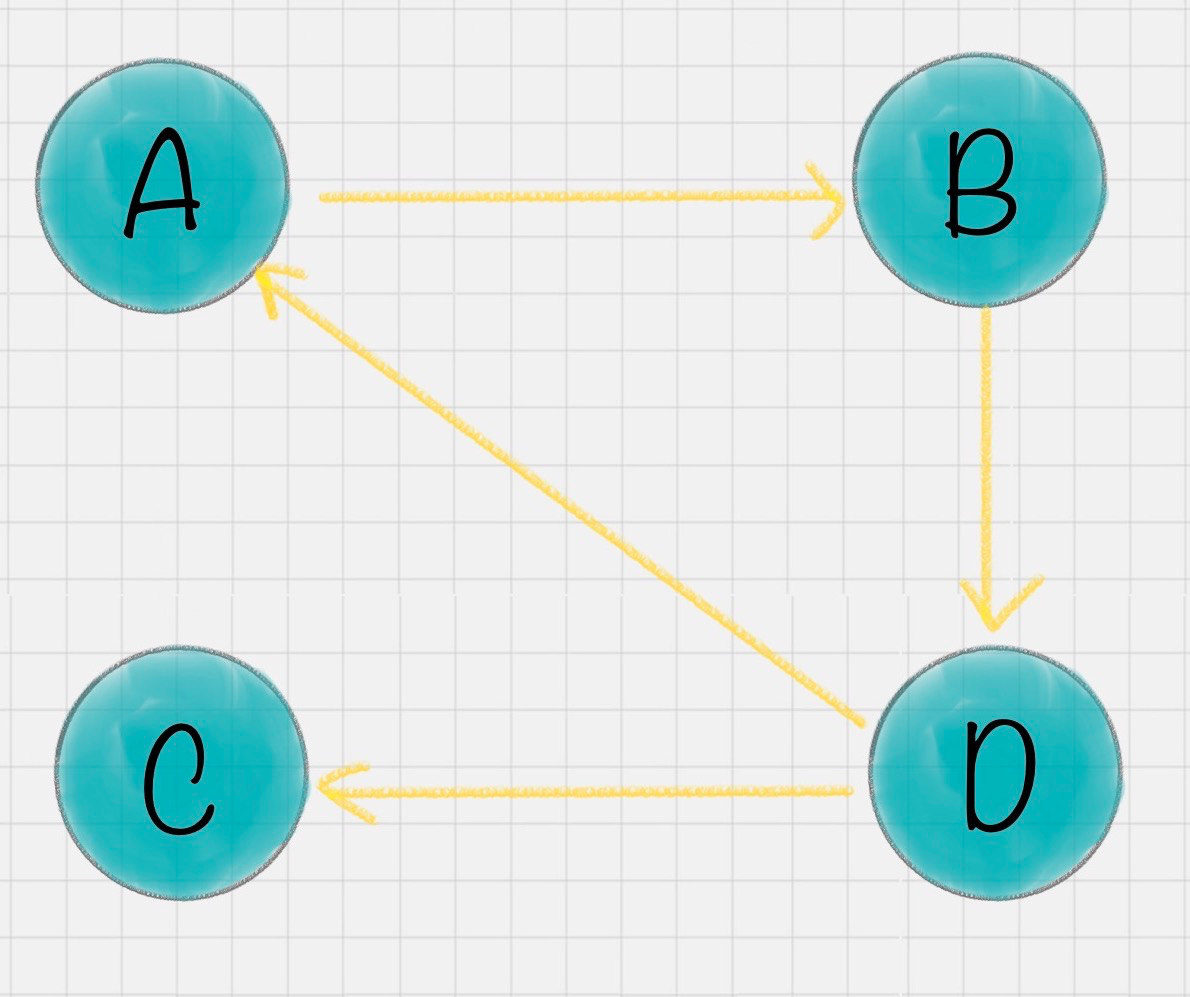

2. 等级沉没（Rank Sink）：如果一个网页只有出链，没有入链（如下图所示），计算的过程迭代下来，会导致这个网页的 PR 值为 0（也就是不存在公式中的 V）。

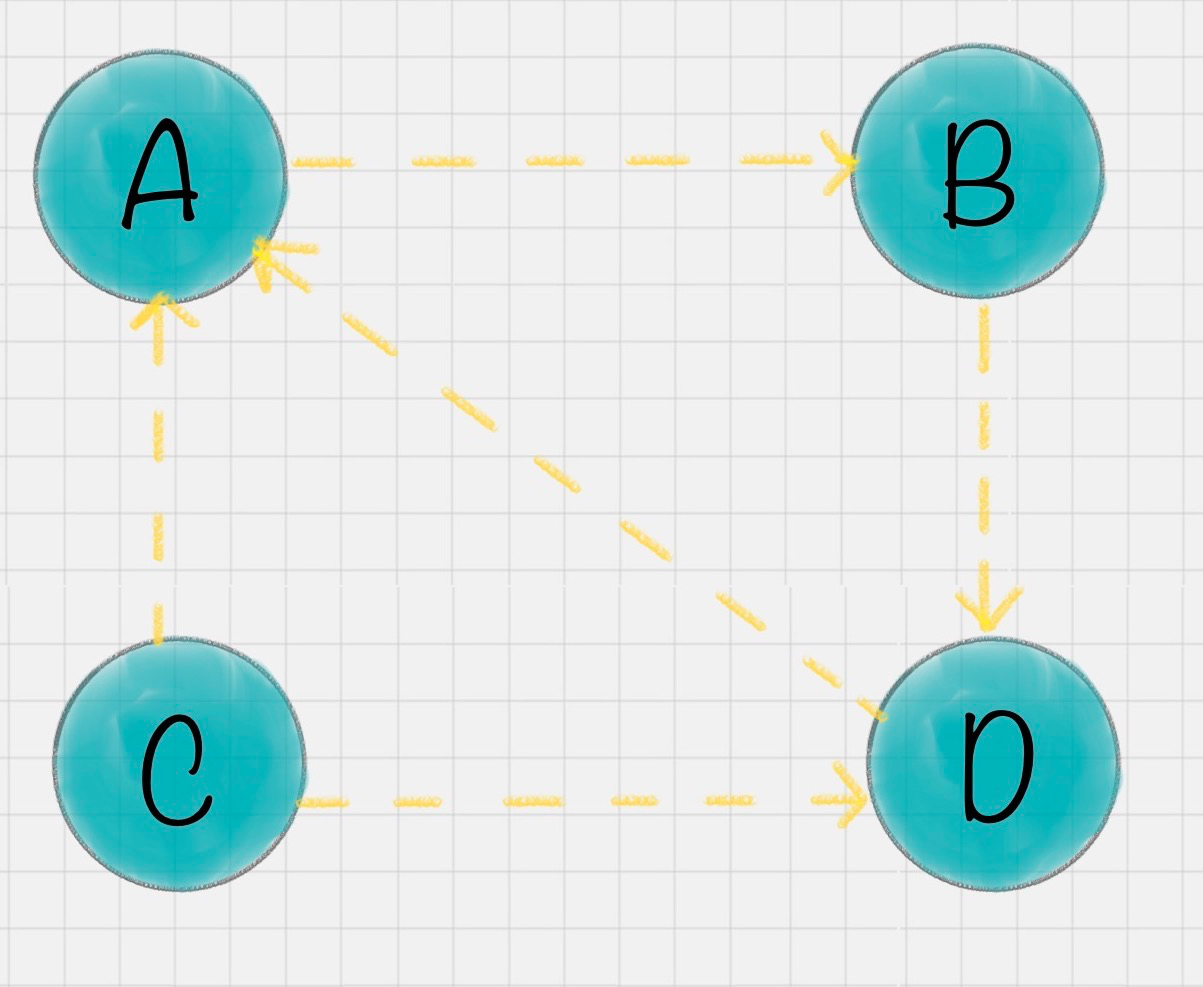

针对等级泄露和等级沉没的情况，我们需要灵活处理。

比如针对等级泄露的情况，我们可以把没有出链的节点，先从图中去掉，等计算完所有节点的 PR 值之后，再加上该节点进行计算。不过这种方法会导致新的等级泄露的节点的产生，所以工作量还是很大的。

有没有一种方法，可以同时解决等级泄露和等级沉没这两个问题呢？

**PageRank 的随机浏览模型**

为了解决简化模型中存在的等级泄露和等级沉没的问题，拉里·佩奇提出了 PageRank 的随机浏览模型。他假设了这样一个场景：用户并不都是按照跳转链接的方式来上网，还有一种可能是不论当前处于哪个页面，都有概率访问到其他任意的页面，比如说用户就是要直接输入网址访问其他页面，虽然这个概率比较小。

所以他定义了阻尼因子 d，这个因子代表了用户按照跳转链接来上网的概率，通常可以取一个固定值 0.85，而 1-d=0.15 则代表了用户不是通过跳转链接的方式来访问网页的，比如直接输入网址。

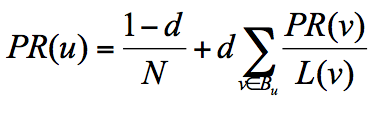

其中 N 为网页总数，这样我们又可以重新迭代网页的权重计算了，因为加入了阻尼因子 d，一定程度上解决了等级泄露和等级沉没的问题。

通过数学定理（这里不进行讲解）也可以证明，最终 PageRank 随机浏览模型是可以收敛的，也就是可以得到一个稳定正常的 PR 值。

**PageRank 在社交影响力评估中的应用**

网页之间会形成一个网络，是我们的互联网，论文之间也存在着相互引用的关系，可以说我们所处的环境就是各种网络的集合。

只要是有网络的地方，就存在出链和入链，就会有 PR 权重的计算，也就可以运用我们今天讲的 PageRank 算法。

我们可以把 PageRank 算法延展到社交网络领域中。比如在微博上，如果我们想要计算某个人的影响力，该怎么做呢？

一个人的微博粉丝数并不一定等于他的实际影响力。如果按照 PageRank 算法，还需要看这些粉丝的质量如何。如果有很多明星或者大 V 关注，那么这个人的影响力一定很高。如果粉丝是通过购买僵尸粉得来的，那么即使粉丝数再多，影响力也不高。

同样，在工作场景中，比如说脉脉这个社交软件，它计算的就是个人在职场的影响力。如果你的工作关系是李开复、江南春这样的名人，那么你的职场影响力一定会很高。反之，如果你是个学生，在职场上被链入的关系比较少的话，职场影响力就会比较低。

同样，如果你想要看一个公司的经营能力，也可以看这家公司都和哪些公司有合作。如果它合作的都是世界 500 强企业，那么这个公司在行业内一定是领导者，如果这个公司的客户都是小客户，即使数量比较多，业内影响力也不一定大。

除非像淘宝一样，有海量的中小客户，最后大客户也会找上门来寻求合作。所以权重高的节点，往往会有一些权重同样很高的节点在进行合作。

**PageRank 给我们带来的启发**

PageRank 可以说是 Google 搜索引擎重要的技术之一，在 1998 年帮助 Google 获得了搜索引擎的领先优势，现在 PageRank 已经比原来复杂很多，但它的思想依然能带给我们很多启发。

比如，如果你想要自己的媒体影响力有所提高，就尽量要混在大 V 圈中；如果想找到高职位的工作，就尽量结识公司高层，或者认识更多的猎头，因为猎头和很多高职位的人员都有链接关系。

同样，PageRank 也可以帮我们识别链接农场。链接农场指的是网页为了链接而链接，填充了一些没有用的内容。这些页面相互链接或者指向了某一个网页，从而想要得到更高的权重。总结今天我给你讲了 PageRank 的算法原理，对简化的 PageRank 模型进行了模拟。针对简化模型中存在的等级泄露和等级沉没这两个问题，PageRank 的随机浏览模型引入了阻尼因子 d 来解决。

同样，PageRank 有很广的应用领域，在许多网络结构中都有应用，比如计算一个人的微博影响力等。它也告诉我们，在社交网络中，链接的质量非常重要。

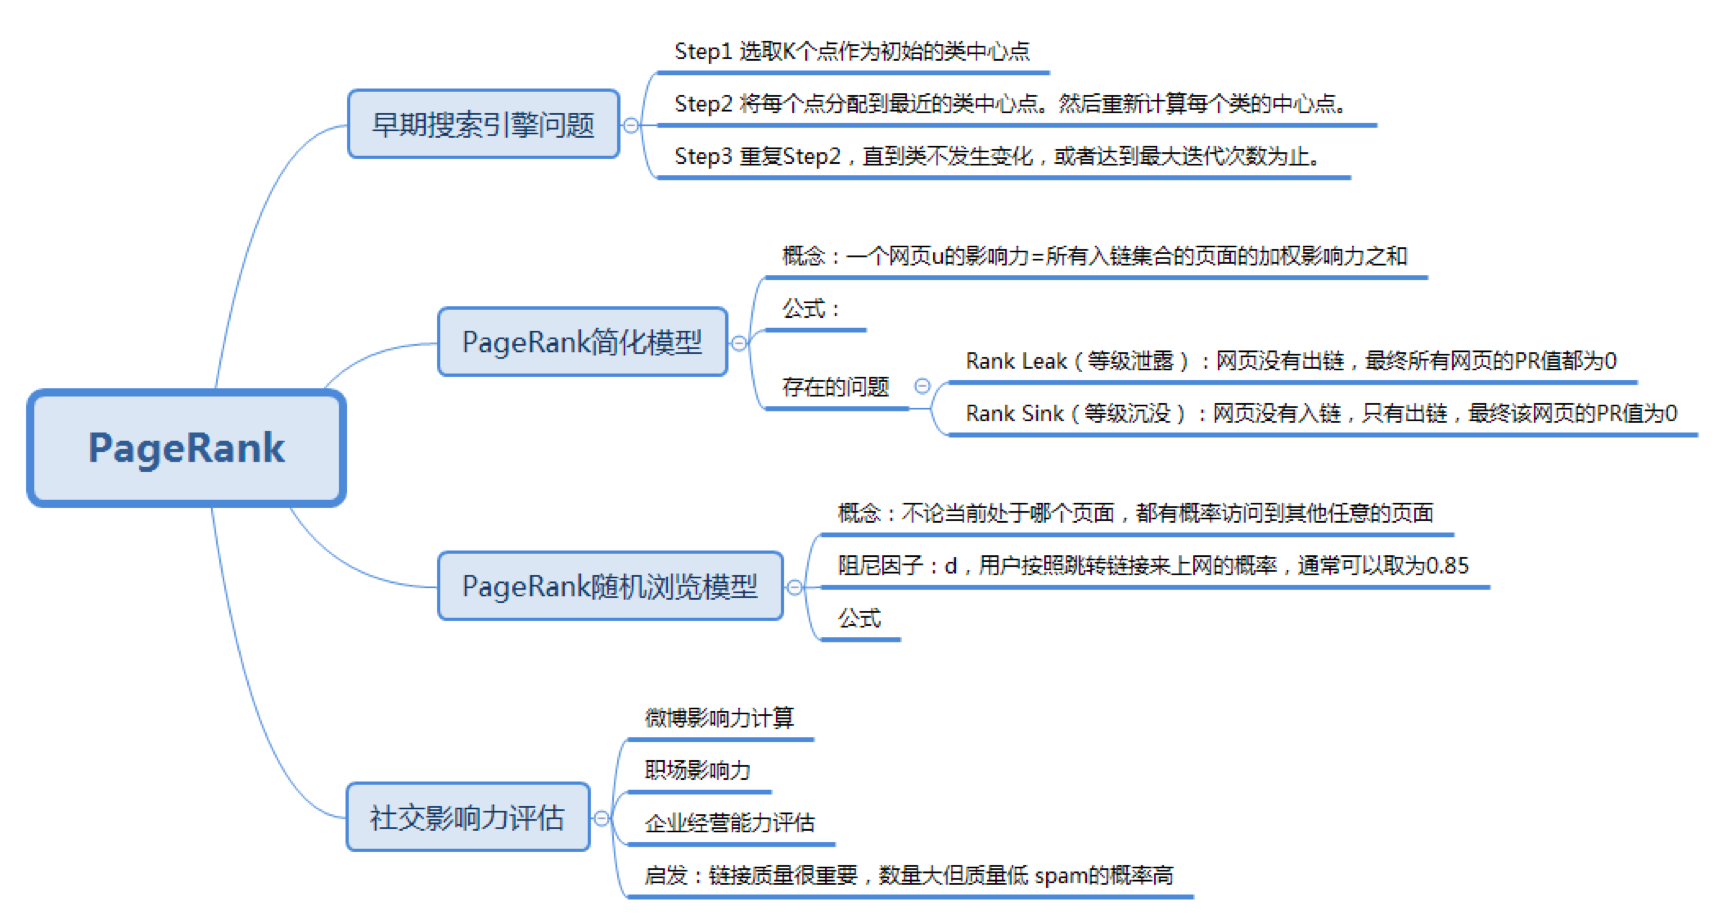

学完今天的内容，你不妨说说 PageRank 的算法原理？另外在现实生活中，除了我在文中举到的几个例子，你还能说一些 PageRank 都有哪些应用场景吗？